In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from category_encoders import WOEEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv
/kaggle/input/playground-series-s3e3/sample_submission.csv
/kaggle/input/playground-series-s3e3/train.csv
/kaggle/input/playground-series-s3e3/test.csv


**Downloading data**

In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e3/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e3/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s3e3/sample_submission.csv')
addition_data = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

train_df['is_generated'] = 1
test_df['is_generated'] = 1
addition_data['is_generated'] = 0

In [3]:
train_df = train_df.drop(527).drop(1398).reset_index(drop=True)

In [4]:
train_df = train_df.drop('id', axis=1)
train_df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,is_generated
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,...,1,10,2,3,10,0,7,8,0,1
1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,...,1,4,3,3,4,2,0,3,0,1
2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,...,2,4,3,3,3,2,1,2,0,1
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,...,0,15,1,1,6,0,0,2,0,1
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,...,0,31,0,3,31,14,4,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,30,Travel_Rarely,945,Sales,1,3,Life Sciences,1,4,Female,...,0,10,2,4,10,0,0,8,0,1
1671,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,1,Male,...,1,10,3,4,4,2,1,3,0,1
1672,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,1,2,Male,...,0,1,2,3,1,0,0,0,1,1
1673,36,Travel_Rarely,441,Sales,9,2,Marketing,1,2,Male,...,2,10,3,2,10,3,0,8,0,1


<AxesSubplot:>

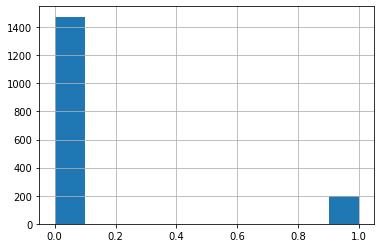

In [5]:
train_df.Attrition.hist()

In [6]:
train_df.isna().any()

Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany

In [7]:
# addition_data['Attrition'] = (addition_data['Attrition'] == 'Yes').astype(int)
addition_data['Attrition'] = addition_data['Attrition'].map(lambda x: 1 if x == "Yes" else 0)
# addition_data = addition_data[addition_data.Attrition == 1]

In [8]:
# addition_data.Attrition.hist()

In [9]:
addition_data.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [10]:
train_df = pd.concat([train_df, addition_data],axis=0, ignore_index=True)
train_df = train_df.drop('EmployeeNumber', axis=1)
train_df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,is_generated
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,...,1,10,2,3,10,0,7,8,0,1
1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,...,1,4,3,3,4,2,0,3,0,1
2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,...,2,4,3,3,3,2,1,2,0,1
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,...,0,15,1,1,6,0,0,2,0,1
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,...,0,31,0,3,31,14,4,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,...,1,17,3,3,5,2,0,3,0,0
3141,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,...,1,9,5,3,7,7,1,7,0,0
3142,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,...,1,6,0,3,6,2,0,3,0,0
3143,49,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,...,0,17,3,2,9,6,0,8,0,0


In [11]:
train_df.isna().any()

Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany

In [12]:
def is_young(x):
    if x <=25:
        return 1
    else:
        return 0
    
def young_and_low_daily_rate(x):
    if x['Age'] <= 25 & x['DailyRate'] < 500:
        return 1
    else:
        return 0
    
def overtime_satisfaction(x):
        if x['OverTime'] == 'Yes':
            return (x['MonthlyIncome'] * (x['StockOptionLevel'] + 0.05) * x['JobSatisfaction'])/x['Age']
        else:
            return (x['MonthlyIncome'] * (x['StockOptionLevel'] + 1.05) * x['JobSatisfaction'])/x['Age']

In [13]:
df = pd.concat([train_df, test_df], axis=0)
df = df.drop(["EmployeeCount", "Over18", "StandardHours"], axis=1)

df['is_young'] = df['Age'].apply(lambda x: is_young(x))
df['young_and_underpaid'] = df.apply(lambda x: young_and_low_daily_rate(x), axis = 1)
df['worklife_stock'] = df.apply(lambda x: x['WorkLifeBalance'] + x['StockOptionLevel'], axis = 1)

df['income_satisfaction'] = df.apply(lambda x: x['JobSatisfaction'] * x['MonthlyIncome'], axis = 1)
df['income_level_environ_job_sat'] = df.apply(lambda x: x['EnvironmentSatisfaction']*x['JobSatisfaction'] * (x['MonthlyIncome']/x['JobLevel']), axis = 1)
df['overtime_stock'] = df.apply(lambda x: overtime_satisfaction(x), axis = 1)

# df = pd.get_dummies(df)
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,YearsWithCurrManager,Attrition,is_generated,id,is_young,young_and_underpaid,worklife_stock,income_satisfaction,income_level_environ_job_sat,overtime_stock
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,4,Male,42,...,8,0.0,1,NaN,0,0,4,10384,41536.0,302.866667
1,35,Travel_Rarely,921,Sales,8,3,Other,1,Male,46,...,3,0.0,1,NaN,0,0,4,2899,2899.0,169.798571
2,32,Travel_Rarely,718,Sales,26,3,Marketing,3,Male,80,...,2,0.0,1,NaN,0,0,5,18508,27762.0,1764.043750
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,3,Female,40,...,2,0.0,1,NaN,0,0,1,5347,8020.5,147.746053
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,2,Female,37,...,10,1.0,1,NaN,0,0,3,19033,7613.2,19.033000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,31,Travel_Rarely,755,Sales,1,1,Life Sciences,3,Male,81,...,0,NaN,1,2791.0,0,0,4,18712,56136.0,1237.406452
1115,40,Travel_Rarely,654,Research & Development,26,5,Medical,3,Male,96,...,8,NaN,1,2792.0,0,0,4,24880,37320.0,1275.100000
1116,42,Travel_Frequently,884,Research & Development,1,4,Medical,2,Female,65,...,2,NaN,1,2793.0,0,0,3,5238,5238.0,255.664286
1117,25,Travel_Frequently,1469,Sales,1,2,Technical Degree,3,Male,68,...,3,NaN,1,2794.0,1,1,4,19196,28794.0,1574.072000


In [14]:
features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'is_generated', 'id', 'is_young',
       'young_and_underpaid', 'worklife_stock', 'income_satisfaction',
        'income_level_environ_job_sat', 'overtime_stock']
cat_features = ['BusinessTravel', 'Department','Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
               'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus','NumCompaniesWorked', 'OverTime', 
               'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                'WorkLifeBalance', 'YearsAtCompany','is_young', 'young_and_underpaid']

Woe encoder from @faelk8 notebook https://www.kaggle.com/code/faelk8/catboost/notebook

In [15]:
woe = WOEEncoder(drop_invariant=True, randomized = True)
for col in cat_features:
    df[col] = df[col].astype(str)
woe.fit(df[features][:-len(test_df)], df['Attrition'][:-len(test_df)], cols = cat_features)
X = woe.transform(df[features])
X['Attrition'] = df['Attrition']
df = X

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y = df['Attrition']
df = df.drop(['id', 'Attrition'], axis=1)

df[df.columns] = scaler.fit_transform(df[df.columns])

In [17]:
train_df = df.iloc[:-len(test_df),:]
train_df['Attrition'] = y[:-len(test_df)]
test_df = df.iloc[-len(test_df):,:].reset_index(drop=True)

X = train_df.drop('Attrition', axis=1)
y = train_df.Attrition
X_test = test_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
# X1 = X[:500]
# y1 = y[:500]
# X = X[500:]
# y = y[500:]

In [19]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,is_generated,is_young,young_and_underpaid,worklife_stock,income_satisfaction,income_level_environ_job_sat,overtime_stock
0,-0.041935,1.732334,-0.679585,-0.681022,1.913935,0.564215,-0.503648,-0.856402,0.786267,-1.276171,...,-1.167639,1.553195,1.052920,0.725346,-0.30825,-0.160436,0.454705,-0.458858,1.228921,-0.552180
1,-0.155464,-0.137536,0.163391,1.390997,-0.108528,0.564215,-1.226645,1.988553,0.786267,-1.074013,...,-0.609382,-0.655044,-0.330810,0.725346,-0.30825,-0.160436,0.454705,-0.957366,-1.252602,-0.725774
2,-0.496053,-0.137536,-0.368050,1.390997,2.166742,0.564215,1.934358,-0.276881,0.786267,0.644332,...,-0.609382,-0.339581,-0.607556,0.725346,-0.30825,-0.160436,1.402340,0.082208,0.344264,1.354003
3,0.185125,-0.137536,1.647761,-0.681022,-0.866952,0.564215,-0.503648,-0.276881,-1.271832,-1.377250,...,-1.167639,-0.655044,-0.607556,0.725346,-0.30825,-0.160436,-2.388200,-0.794327,-0.923666,-0.754543
4,1.547480,-0.137536,0.414713,-0.681022,-0.487740,-1.121629,-0.503648,-0.115978,-1.271832,-1.528869,...,2.740158,0.606807,1.606412,0.725346,-0.30825,-0.160436,-0.492930,0.117173,-0.949825,-0.922456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,-0.041935,1.732334,0.066527,-0.681022,1.787531,-0.153055,-0.503648,-0.276881,0.786267,-1.326710,...,-0.609382,-0.655044,-0.330810,-1.378652,-0.30825,-0.160436,0.454705,-0.465518,-0.448035,-0.183318
3141,0.298654,-0.137536,-0.642934,-0.681022,-0.361336,1.690170,-0.503648,-0.856402,0.786267,-1.276171,...,0.786260,-0.339581,0.776174,-1.378652,-0.30825,-0.160436,0.454705,-0.485032,-0.583211,-0.262176
3142,-1.063701,-0.137536,-1.841948,-0.681022,-0.614144,0.564215,-0.351985,-0.115978,0.786267,0.998109,...,-0.609382,-0.655044,-0.330810,-1.378652,-0.30825,-0.160436,0.454705,-0.332316,-0.649835,-0.324086
3143,1.433951,1.732334,0.430420,1.390997,-0.866952,0.564215,-0.503648,-0.856402,0.786267,-0.214840,...,0.507131,-0.655044,1.052920,-1.378652,-0.30825,-0.160436,-1.440565,-0.432484,-0.054069,-0.645934


**Keras NN**

In [20]:
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras import layers

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Lambda, Concatenate, Add, BatchNormalization, LeakyReLU

from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold

from sklearn.metrics import classification_report

# import keras_tuner

In [21]:
models = []
preds = []

class_weight = 10 

n_folds = 11 #10
repeats = 10 #10 
dr = 0.1     

# k_fold = StratifiedKFold(n_splits=n_folds, random_state=42, shuffle=True)
k_fold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=repeats, random_state=42)

def get_model():
    model = keras.Sequential([
    layers.Dense(512), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(256), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(128), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(64), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.BatchNormalization(),
    layers.Dense(32), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(16), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(8),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(4), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dense(2), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dense(1, activation='sigmoid')
   ])

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    
    model.compile(
    optimizer=opt,
        loss=tfa.losses.SigmoidFocalCrossEntropy(
                                             alpha=0.8,
                                             gamma=2.0
                                             ),
        metrics='AUC',
)
    
    return model



early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_auc", 
        mode='max',
        patience=30,
        min_delta=0.00001,
        restore_best_weights=True,
)
plat = keras.callbacks.ReduceLROnPlateau(
        monitor="val_auc", 
        mode='max', 
        patience=3, 
        factor=0.1, 
        min_lr=1e-8, 
        min_delta=0.000001)


for train_index, test_index in k_fold.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model = get_model()

    history = model.fit(
          X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=64,
          epochs=500,
          class_weight = { 0: 1.0, 1: class_weight, },
          callbacks=[early_stopping, plat],
          verbose=0
         )
    
#     print(classification_report(y, np.round(model.predict(X))))
    models.append(model)
    preds.append(model.predict(X_test))


2023-01-22 12:35:51.082066: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-22 12:35:51.171892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-22 12:35:51.172641: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-22 12:35:51.174258: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/500
25/25 [==============================] - 3s 19ms/step - loss: 0.5513 - auc: 0.6384 - val_loss: 0.0448 - val_auc: 0.7665
Epoch 2/500
25/25 [==============================] - 0s 16ms/step - loss: 0.3177 - auc: 0.7515 - val_loss: 0.0446 - val_auc: 0.7873
Epoch 3/500
25/25 [==============================] - 0s 13ms/step - loss: 0.2600 - auc: 0.7652 - val_loss: 0.0442 - val_auc: 0.8043
Epoch 4/500
25/25 [==============================] - 0s 13ms/step - loss: 0.2496 - auc: 0.7817 - val_loss: 0.0439 - val_auc: 0.8150
Epoch 5/500
25/25 [==============================] - 0s 10ms/step - loss: 0.2035 - auc: 0.7933 - val_loss: 0.0439 - val_auc: 0.8216
Epoch 6/500
25/25 [==============================] - 0s 7ms/step - loss: 0.1651 - auc: 0.8165 - val_loss: 0.0440 - val_auc: 0.8222
Epoch 7/500
25/25 [==============================] - 0s 7ms/step - loss: 0.1453 - auc: 0.8168 - val_loss: 0.0445 - val_auc: 0.8230
Epoch 8/500
25/25 [==============================] - 0s 7ms/step - loss: 0.152

<AxesSubplot:>

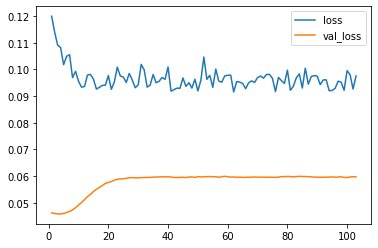

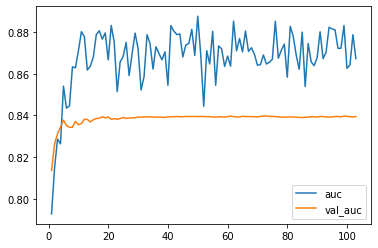

In [22]:
history_df = pd.DataFrame(history.history)
history_df.loc[1:, ['loss', 'val_loss']].plot()
history_df.loc[1:, ['auc', 'val_auc']].plot()

In [23]:
# preds_evalX1 = []
# for model in models:
#     preds_evalX1.append(model.predict(X1))
    
# predsX1 = np.average(np.array(preds_evalX1),axis=0)
# dfX1 = pd.DataFrame(predsX1)
# dfX1.to_csv('KerasNNX1.csv')
# dfX1

In [24]:
preds_eval = []
for model in models:
    preds_eval.append(model.predict(X))
    
print(classification_report(y, np.round(np.average(np.array(preds_eval),axis=0))))

              precision    recall  f1-score   support

         0.0       0.99      0.44      0.61      2708
         1.0       0.22      0.97      0.36       437

    accuracy                           0.52      3145
   macro avg       0.61      0.71      0.49      3145
weighted avg       0.88      0.52      0.58      3145



In [25]:
pred = np.average(np.array(preds),axis=0)
pred

array([[0.73319554],
       [0.6909164 ],
       [0.35170877],
       ...,
       [0.53726584],
       [0.46089655],
       [0.24250673]], dtype=float32)

In [26]:
submission['Attrition'] = pred
submission['Attrition'] = submission['Attrition'].clip(0,1)
submission

,id,Attrition
0,1677,0.733196
1,1678,0.690916
2,1679,0.351709
3,1680,0.472925
4,1681,0.801361
...,...,...
1114,2791,0.584213
1115,2792,0.263499
1116,2793,0.537266
1117,2794,0.460897


In [27]:
submission.to_csv('submission.csv', index=False)

<AxesSubplot:>

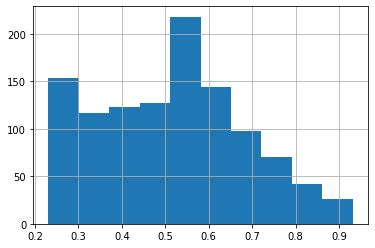

In [28]:
submission.Attrition.hist()